# UK Charging Stations Dataset #

## Load file ##

Install packages, import libraries.

Print basic info about dataset.

In [ ]:
# Install packages
!pip install pandas matplotlib basemap

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load file
charge_load = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BHAM/DSGP/DSGP-SharedFile/data/national-charge-point-registry.csv')

<ipython-input-8-71d84a6d9e65>:2: DtypeWarning: Columns (5,7,10,11,17,18,19,21,24,37,38,42,44,46,47,49,51,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,79,90,101,104,108,111,112,115,119,122,123,126,130,133,134,137,141,144,148,152,155) have mixed types. Specify dtype option on import or set low_memory=False.
  charge_load = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BHAM/DSGP/DSGP-SharedFile/data/national-charge-point-registry.csv')


In [ ]:
# Display rows and columns and their datatypes
print("\033[1m---Rows and columns:---\033[0m")
print(charge_load.shape)
print("\n\n\033[1m---Columns and their data types:---\033[0m")
print(charge_load.info())

---Rows and columns:---
(38591, 158)


---Columns and their data types:---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38591 entries, 0 to 38590
Columns: 158 entries, chargeDeviceID to connector8Validated
dtypes: float64(61), int64(11), object(86)
memory usage: 46.5+ MB
None


Remove unneccessary columns.

In [ ]:
# Print all columns
for column in charge_load.columns:
    print(column)

chargeDeviceID
reference
name
latitude
longitude
subBuildingName
buildingName
buildingNumber
thoroughfare
street
doubleDependantLocality
dependantLocality
town
county
postcode
countryCode
uprn
deviceDescription
locationShortDescription
locationLongDescription
deviceManufacturer
deviceModel
deviceOwnerName
deviceOwnerWebsite
deviceOwnerTelephoneNo
deviceOwnerContactName
deviceControllerName
deviceControllerWebsite
deviceControllerTelephoneNo
deviceControllerContactName
deviceNetworks
chargeDeviceStatus
publishStatus
deviceValidated
dateCreated
dateUpdated
moderated
lastUpdated
lastUpdatedBy
attribution
dateDeleted
paymentRequired
paymentRequiredDetails
subscriptionRequired
subscriptionRequiredDetails
parkingFeesFlag
parkingFeesDetails
parkingFeesUrl
accessRestrictionFlag
accessRestrictionDetails
physicalRestrictionFlag
physicalRestrictionText
onStreetFlag
locationType
bearing
access24Hours
accessMondayFrom
accessMondayTo
accessTuesdayFrom
accessTuesdayTo
accessWednesdayFrom
accessWednes

In [ ]:
# Drop unneccessary columns
columns_to_keep = ['chargeDeviceID', 'reference', 'name', 'latitude',
                   'longitude', 'town', 'county', 'postcode', 'dateCreated',
                   'dateUpdated']  # list of columns to keep
columns_to_drop = set(charge_load.columns) - set(columns_to_keep)
charge = charge_load.drop(columns=columns_to_drop)

Print info about new 'charge' dataset.

In [ ]:
charge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38591 entries, 0 to 38590
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   chargeDeviceID  38591 non-null  object 
 1   reference       38591 non-null  object 
 2   name            38590 non-null  object 
 3   latitude        38591 non-null  float64
 4   longitude       38591 non-null  float64
 5   town            38581 non-null  object 
 6   county          37972 non-null  object 
 7   postcode        38588 non-null  object 
 8   dateCreated     38591 non-null  object 
 9   dateUpdated     38591 non-null  object 
dtypes: float64(2), object(8)
memory usage: 2.9+ MB


## Plot map ##

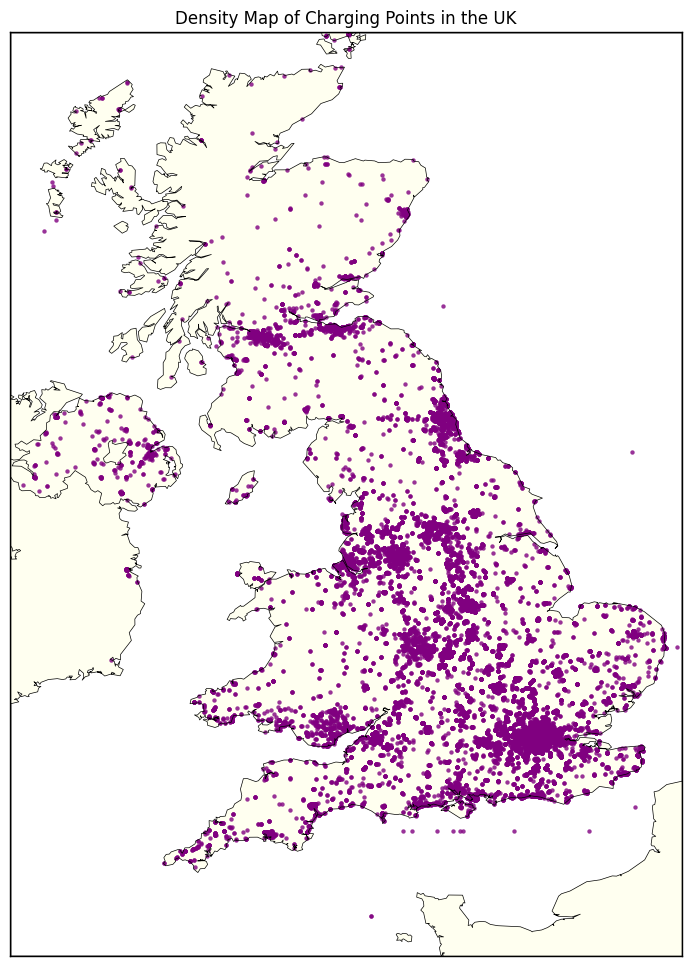

In [ ]:
# Method to draw map
def drawDensityMap(llcrnrlat=49, urcrnrlat=59, llcrnrlon=-8, urcrnrlon=2):
    m = Basemap(projection='mill', llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat, llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon, lat_ts=20, resolution='i')

    fig = plt.figure(figsize=(16, 12))  # set figure size

    # Draw the land with off-white color, leave water white
    m.drawmapboundary(fill_color='none')
    m.fillcontinents(color='ivory', lake_color='none', zorder=0)

    # Plot coastline
    m.drawcoastlines(linewidth=0.5)

    # Plot county lines
    m.drawcountries(linewidth=0.5)

    # Plot the charging points in red
    x, y = m(charge['longitude'].values, charge['latitude'].values)
    m.scatter(x, y, s=10, color='purple', alpha=0.8, linewidths=0.000000000001)

    plt.title('Density Map of Charging Points in the UK')
    plt.show()

# Show map
drawDensityMap()

## Timestamp processing ##

In [ ]:
charge.head()

,chargeDeviceID,reference,name,latitude,longitude,town,county,postcode,dateCreated,dateUpdated
0,b86a77a42bb68c81946ec50cfc95e89d,11172306P,Network Rail Westwood Centre 1,52.386590,-1.587384,Coventry,City of Coventry,CV4 8GP,2013-08-05 16:15:16,2020-04-26 17:10:03
1,dc1c347d471f68e41ad2a9a1145941d6,APT-0296-0015/13P,Brindley Drive Car Park Birmingham - 70524,52.480918,-1.907710,Birmingham,West Midlands,B1 2NB,0000-00-00 00:00:00,2016-03-15 11:09:18
2,7d545ad9367ccb8a80c94a953314ae71,CM123,Renault Liverpool,53.383579,-2.977230,Liverpool,NaN,L8 6PZ,2020-05-04 10:33:41,2020-05-04 10:33:41
3,68c7fca1e3bba5e49ec90847dcdd456b,CM164,NCP Portman Square,51.516201,-0.157996,London,Greater London,W1H 7BG,2020-05-04 10:33:48,2023-07-14 15:45:36
4,ac7a21c48f5833b33a5b606b2089e6a9,CM167,NCP Prince Street Car Park,51.450340,-2.596704,Bristol,NaN,BS1 4QF,2020-05-04 10:33:48,2020-05-04 10:33:48


In [ ]:
# Convert columns to timestamps
charge['dateCreated'] = pd.to_datetime(charge['dateCreated'], errors='coerce')
charge['dateUpdated'] = pd.to_datetime(charge['dateUpdated'], errors='coerce')
# for 0000-00-00 00:00:00 put NaT (otherwise error)

In [ ]:
# Replace NaT values in 'dateCreated' with corresponding dates from 'dateUpdated'
charge.loc[charge['dateCreated'].isnull(), 'dateCreated'] = charge.loc[charge['dateCreated'].isnull(), 'dateUpdated']

# Drop dateUpdated, as not needed
charge.drop(columns='dateUpdated')

,chargeDeviceID,reference,name,latitude,longitude,town,county,postcode,dateCreated
0,b86a77a42bb68c81946ec50cfc95e89d,11172306P,Network Rail Westwood Centre 1,52.386590,-1.587384,Coventry,City of Coventry,CV4 8GP,2013-08-05 16:15:16
1,dc1c347d471f68e41ad2a9a1145941d6,APT-0296-0015/13P,Brindley Drive Car Park Birmingham - 70524,52.480918,-1.907710,Birmingham,West Midlands,B1 2NB,2016-03-15 11:09:18
2,7d545ad9367ccb8a80c94a953314ae71,CM123,Renault Liverpool,53.383579,-2.977230,Liverpool,NaN,L8 6PZ,2020-05-04 10:33:41
3,68c7fca1e3bba5e49ec90847dcdd456b,CM164,NCP Portman Square,51.516201,-0.157996,London,Greater London,W1H 7BG,2020-05-04 10:33:48
4,ac7a21c48f5833b33a5b606b2089e6a9,CM167,NCP Prince Street Car Park,51.450340,-2.596704,Bristol,NaN,BS1 4QF,2020-05-04 10:33:48
...,...,...,...,...,...,...,...,...,...
38586,0b679813d957cebc8a382fdfa5ecf261,23BZ1125BX,Teesbay Retail Park 3,54.665278,-1.208947,Hartlepool,County Durham,TS25 1XJ,2023-12-11 17:11:48
38587,c3c38bb0b4ba731e8843b8229f8b2457,23BZ1127B,McDonald's Lowestoft Leisure Way 1,52.501715,1.735770,Lowestoft,Suffolk,NR32 4TZ,2023-12-20 10:41:26
38588,9cc78a3d1c3e408768736970841adf9c,23BZ1122B,McDonald's Lowestoft Leisure Way 2,52.501715,1.735770,Lowestoft,Suffolk,NR32 4TZ,2023-12-20 10:43:45
38589,4e9a11c06042c3ac9791359f821402a6,23BZ1277B,McDonald's Lowestoft Leisure Way 3,52.501715,1.735770,Lowestoft,Suffolk,NR32 4TZ,2023-12-20 10:45:29


In [ ]:
charge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38591 entries, 0 to 38590
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   chargeDeviceID  38591 non-null  object        
 1   reference       38591 non-null  object        
 2   name            38590 non-null  object        
 3   latitude        38591 non-null  float64       
 4   longitude       38591 non-null  float64       
 5   town            38581 non-null  object        
 6   county          37972 non-null  object        
 7   postcode        38588 non-null  object        
 8   dateCreated     38591 non-null  datetime64[ns]
 9   dateUpdated     38421 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 2.9+ MB


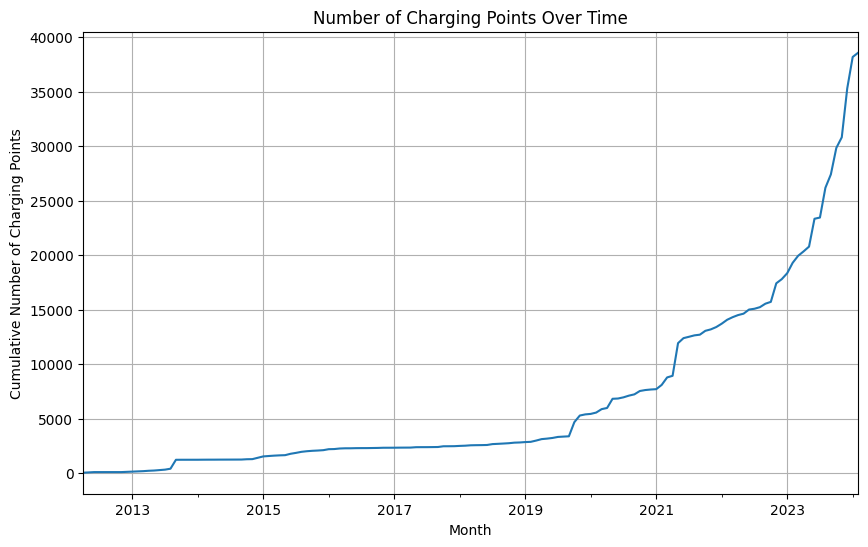

In [ ]:
# Extract the month and year from the 'dateCreated' column
charge['Month'] = charge['dateCreated'].dt.to_period('M')

# Group the data by 'Month' and count the number of charging points for each month
charging_points_count_by_month = charge.groupby('Month').size()

# Calculate the cumulative sum of the charging points count by month
cumulative_charging_points_count_by_month = charging_points_count_by_month.cumsum()

# Plot the progression of the cumulative number of charging points by month over time
plt.figure(figsize=(10, 6))
cumulative_charging_points_count_by_month.plot(kind='line', linestyle='-')
plt.title('Number of Charging Points Over Time')
plt.xlabel('Month')
plt.ylabel('Cumulative Number of Charging Points')
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

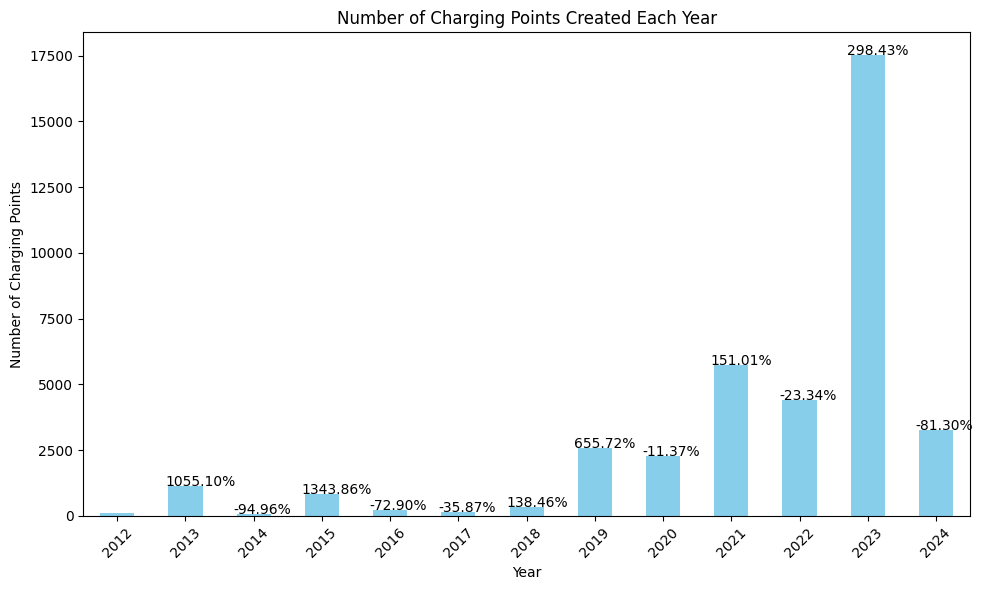

In [ ]:
# Extract the year from the 'dateCreated' column
charge['Year'] = charge['dateCreated'].dt.year

# Group the data by 'Year' and count the number of charging points for each year
charging_points_count_by_year = charge.groupby('Year').size()

# Plot the number of charging points created each year using a bar plot
plt.figure(figsize=(10, 6))
charging_points_count_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Charging Points Created Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Charging Points')
plt.xticks(rotation=45)

# Annotate each bar with the percentage increase from the previous year
for i, v in enumerate(charging_points_count_by_year):
    if i > 0:
        percentage_increase = ((v - charging_points_count_by_year.iloc[i - 1]) / charging_points_count_by_year.iloc[i - 1]) * 100
        plt.text(i - 0.3, v + 10, f'{percentage_increase:.2f}%', color='black')

plt.tight_layout()
plt.show()

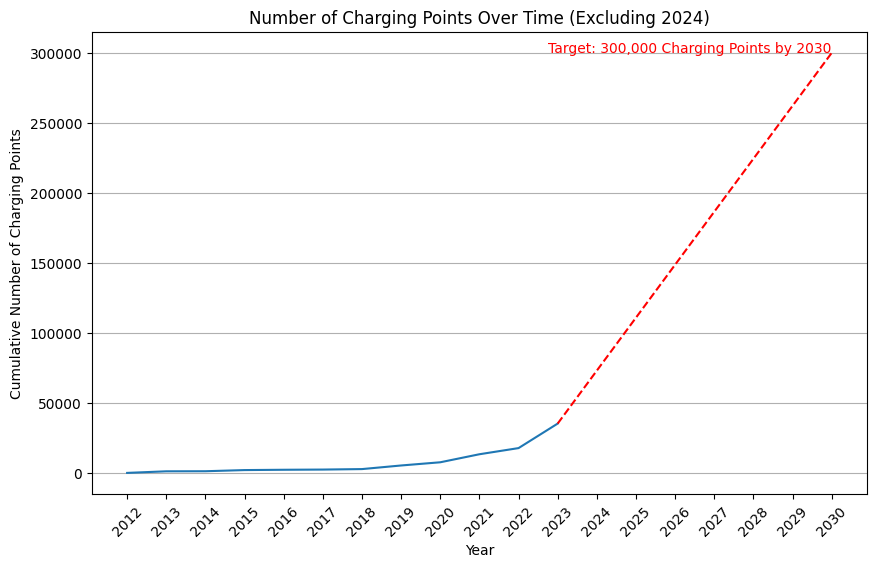

In [ ]:
# Filter out the data for year 2024
charging_points_count_by_year_excluded_2024 = charging_points_count_by_year.drop(2024)

# Calculate the cumulative sum of the charging points count by year
cumulative_charging_points_count_by_year_excluded_2024 = charging_points_count_by_year_excluded_2024.cumsum()

# Plot the cumulative number of charging points by year over time
plt.figure(figsize=(10, 6))
cumulative_charging_points_count_by_year_excluded_2024.plot(kind='line', linestyle='-')
plt.title('Number of Charging Points Over Time (Excluding 2024)')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Charging Points')
plt.grid(axis='y')  # Remove vertical grid lines
plt.xticks(rotation=45)  # Rotate x-axis ticks by 45 degrees

# Set the x-axis tick locations to integer years
years_excluded_2024 = cumulative_charging_points_count_by_year_excluded_2024.index.astype(int)
plt.xticks(years_excluded_2024)

# Extend the x-axis ticks until 2030
ticks_excluded_2024 = list(years_excluded_2024) + list(range(years_excluded_2024[-1] + 1, 2031))
plt.xticks(ticks_excluded_2024)

# Target number of charging points by 2030
target_year = 2030
target_charging_points = 300000

# Get the last year and last cumulative charging points count from the existing data
last_year = cumulative_charging_points_count_by_year_excluded_2024.index[-1]
last_cumulative_count = cumulative_charging_points_count_by_year_excluded_2024.iloc[-1]

# Create a linear progression from the last data point to the target value in 2030
projection_years = pd.period_range(start=last_year, end=target_year, freq='Y')
projection_counts = pd.Series(index=projection_years, dtype='float64')  # Specify dtype explicitly
projection_counts.iloc[0] = last_cumulative_count
projection_counts.iloc[-1] = target_charging_points
projection_counts.interpolate(method='linear', inplace=True)

# Convert Period index to integers representing years
projection_years_int = projection_years.year.astype(int)

# Plot the linear projection as a dashed line continuation of the existing line plot
plt.plot(projection_years_int, projection_counts.values, linestyle='--', color='red')

# Annotate the target goal with a text label
plt.text(target_year, target_charging_points, f'Target: {target_charging_points:,} Charging Points by {target_year}', color='red', ha='right')

plt.show()

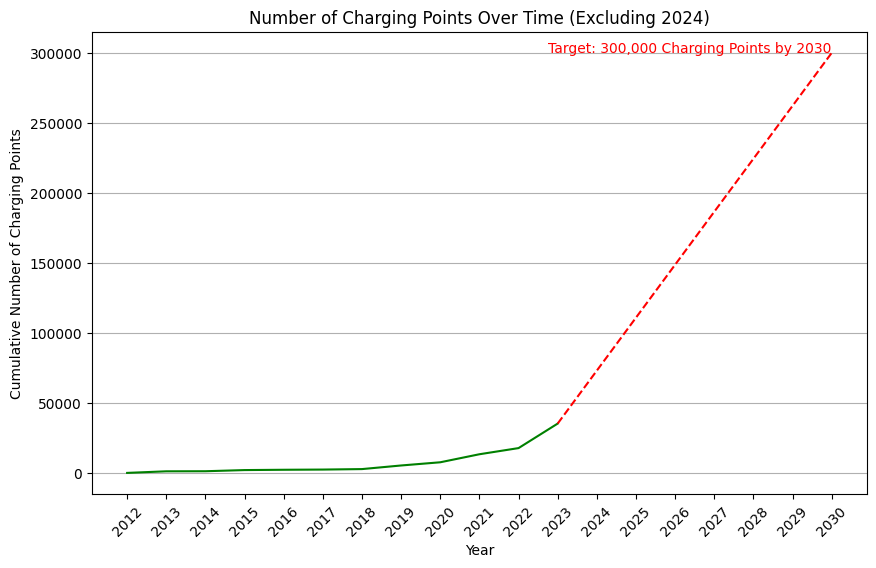

In [ ]:
# Filter out the data for year 2024
charging_points_count_by_year_excluded_2024 = charging_points_count_by_year.drop(2024)

# Calculate the cumulative sum of the charging points count by year
cumulative_charging_points_count_by_year_excluded_2024 = charging_points_count_by_year_excluded_2024.cumsum()

# Plot the cumulative number of charging points by year over time
plt.figure(figsize=(10, 6))
cumulative_charging_points_count_by_year_excluded_2024.plot(kind='line', linestyle='-', color='green')  # Changed color to green
plt.title('Number of Charging Points Over Time (Excluding 2024)')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Charging Points')
plt.grid(axis='y')  # Remove vertical grid lines
plt.xticks(rotation=45)  # Rotate x-axis ticks by 45 degrees

# Set the x-axis tick locations to integer years
years_excluded_2024 = cumulative_charging_points_count_by_year_excluded_2024.index.astype(int)
plt.xticks(years_excluded_2024)

# Extend the x-axis ticks until 2030
ticks_excluded_2024 = list(years_excluded_2024) + list(range(years_excluded_2024[-1] + 1, 2031))
plt.xticks(ticks_excluded_2024)

# Target number of charging points by 2030
target_year = 2030
target_charging_points = 300000

# Get the last year and last cumulative charging points count from the existing data
last_year = cumulative_charging_points_count_by_year_excluded_2024.index[-1]
last_cumulative_count = cumulative_charging_points_count_by_year_excluded_2024.iloc[-1]

# Create a linear progression from the last data point to the target value in 2030
projection_years = pd.period_range(start=last_year, end=target_year, freq='Y')
projection_counts = pd.Series(index=projection_years, dtype='float64')  # Specify dtype explicitly
projection_counts.iloc[0] = last_cumulative_count
projection_counts.iloc[-1] = target_charging_points
projection_counts.interpolate(method='linear', inplace=True)

# Convert Period index to integers representing years
projection_years_int = projection_years.year.astype(int)

# Plot the linear projection as a dashed line continuation of the existing line plot
plt.plot(projection_years_int, projection_counts.values, linestyle='--', color='red')  # Keep color as red for the prediction line

# Annotate the target goal with a text label
plt.text(target_year, target_charging_points, f'Target: {target_charging_points:,} Charging Points by {target_year}', color='red', ha='right')  # Keep color as red for the annotation

plt.show()

In [ ]:
charge['chargeDeviceID'].count()

38591